<a href="https://colab.research.google.com/github/libera26/lol_analysis/blob/main/lol_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 실행 폴더를 현재 경로로 설정
from google.colab import drive
drive.mount('/content/drive')
# sql 사용하기 위해 duckdb 설치
!pip install duckdb

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import duckdb



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 27.3 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## **Part1: 연도별 데이터 추출**

### **2019년 데이터 추출**

In [ ]:
champion19.head()

,Unnamed: 0,champion,sum_total,win_total,lose_total,winrate_total,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,...,winrate_30_35_min,matches_35_40_min,win_lose_35_40_min,winrate_35_40_min,matches_40_45_min,win_lose_40_45_min,winrate_40_45_min,matches_more_45_min,win_lose_more_45_min,winrate_more_45_min
0,1,Kai'Sa,71,37,34,52%,30,15,15,50%,...,46%,11,4-7,36%,5,3-2,60%,1,1-0,100%
1,2,Lee Sin,58,30,28,52%,21,11,10,52%,...,45%,10,6-4,60%,8,5-3,63%,1,0-1,0%
2,3,Xayah,57,35,22,61%,33,21,12,64%,...,70%,9,3-6,33%,5,2-3,40%,2,2-0,100%
3,4,Nautilus,52,28,24,54%,27,17,10,63%,...,47%,11,7-4,64%,5,3-2,60%,2,2-0,100%
4,5,Gragas,49,32,17,65%,26,16,10,62%,...,59%,7,6-1,86%,6,6-0,100%,2,1-1,50%


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)
player19.head()

,Unnamed: 0,date,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,0,43740.286146,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,0,4,4,7,22,0,0,0,0,0,0,0,3.879983,0.000000,0.037688,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,0,13.588567,0,0,1,10,0,1,11588,436.733668,0.312067,0.206844,11,0.414573,0.105769,4,0.150754,4,6,,,8407,184.059799,8300,-0.151448,180,8,4,1,7.085427,3078,3440,-362,4670,5468,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1,43740.286146,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,4,5,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.263819,1.092965,1,9.717567,1,2,1,2,0,0,0,1,0,0,0,0,13.588567,0,0,1,10,0,1,7925,298.680905,0.213422,0.166862,24,0.904523,0.230769,8,0.301508,11,13,,,7463,148.481910,7360,-0.296789,35,96,76,0,4.937186,3684,4055,-371,4912,6278,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,2,43740.286146,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,5,6,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.113065,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,0,13.588567,0,0,1,10,0,1,7557,284.811558,0.203512,0.210106,13,0.489950,0.125000,1,0.037688,6,7,,,8484,186.961809,7700,-0.281729,186,6,4,0,7.236181,3926,3569,357,5487,6116,-629,4751,4533,218,88,85,3,131,150,-19
3,3,43740.286146,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,3,4,1,7,22,1,0,0,0,0,0,0,3.879983,0.113065,0.414573,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,0,13.588567,0,0,1,10,0,1,7369,277.726131,0.198449,0.300743,9,0.339196,0.086538,7,0.263819,3,4,,,10624,267.615075,10150,-0.215385,219,20,20,0,9.007538,3579,3969,-390,5313,7142,-1829,3526,3532,-6,87,76,11,119,134,-15
4,4,43740.286146,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,2,5,2,7,22,0,0,0,0,0,0,1,3.879983,0.075377,0.000000,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,0,13.588567,0,0,1,10,0,1,2694,101.532663,0.072550,0.115445,47,1.771357,0.451923,8,0.301508,13,14,,,6249,102.728141,5450,-0.296875,12,2,2,0,0.527638,2088,2394,-306,3163,4319,-1156,2731,2376,355,4,3,1,6,5,1


In [ ]:
match19

,Unnamed: 0,team1,team2,winner,date,pbp_caster,color_caster,mvp,blue,red
0,0,Fnatic,SK Telecom T1,SK Telecom T1,2019-10-12 12:00:00,Atlus,"Froskurinn, Kobe",Faker,Fnatic,SK Telecom T1
1,1,Royal Never Give Up,Clutch Gaming,Royal Never Give Up,2019-10-12 13:00:00,Atlus,"Froskurinn, Kobe",Langx,Royal Never Give Up,Clutch Gaming
2,2,Invictus Gaming,ahq eSports Club,Invictus Gaming,2019-10-12 14:00:00,Atlus,"Froskurinn, Kobe",Rookie,Invictus Gaming,ahq eSports Club
3,3,DAMWON Gaming,Team Liquid,Team Liquid,2019-10-12 15:00:00,Phreak,"Azael, Spawn",Impact,DAMWON Gaming,Team Liquid
4,4,J Team,FunPlus Phoenix,J Team,2019-10-12 16:00:00,Phreak,"Azael, Spawn",FoFo,J Team,FunPlus Phoenix
...,...,...,...,...,...,...,...,...,...,...
76,76,Flamengo eSports,Royal Youth,Royal Youth,2019-10-05 16:00:00,Drakos,Ender,Armut,Royal Youth,Flamengo eSports
77,77,DAMWON Gaming,Lowkey Esports,DAMWON Gaming,2019-10-07 11:00:00,Atlus,Jatt,ShowMaker,Lowkey Esports,DAMWON Gaming
78,81,Clutch Gaming,Royal Youth,Clutch Gaming,2019-10-07 16:00:00,Medic,EGym,Cody Sun,Clutch Gaming,Royal Youth
79,84,Hong Kong Attitude,Isurus,Hong Kong Attitude,2019-10-08 11:00:00,Medic,Spawn,Kaiwing,Hong Kong Attitude,Isurus


In [ ]:
pd.set_option('display.max_rows', 10)

### 2019년 데이터추출
%cd /content/drive/MyDrive/archive 2019

# 현재 경로 설정
current_dir = os.getcwd()

# 파일 읽기
champion19 = pd.read_csv('wc_champions.csv')
match19 = pd.read_csv('wc_matches.csv')
player19 = pd.read_csv('wc_players.csv')

# null값 있는 컬럼 제거
# player19.isnull().any()
player19=player19.loc[:,~player19.columns.isin(['heraldtime','fbaron','fbarontime'])]

# match, player 데이터 조인(player 기준 조인)
# 조인 후 win(1,0)컬럼 추가
# pd.set_option('display.max_rows', None)
output_match1=duckdb.query("select * from match19 m right join player19 o on upper(m.team1)=upper(o.team)").to_df()
output_match1.loc[output_match1['team1']==output_match1['winner'], 'win'] = 1
output_match1.loc[output_match1['team1']!=output_match1['winner'], 'win'] = 0

output_match2=duckdb.query("select * from match19 m right join player19 o on upper(m.team2)=upper(o.team)").to_df()
output_match2.loc[output_match2['team2']==output_match2['winner'], 'win'] = 1
output_match2.loc[output_match2['team2']!=output_match2['winner'], 'win'] = 0

# concat 전 team1, team2 기준 조인한 데이터들의 null값 포함한 행 제거
output1_notnull = output_match1.dropna(subset=['winner'])
output2_notnull = output_match2.dropna(subset=['winner'])
# len(output_match2)
# output1_notnull.dtype

# 위아래(axis=0)로 합치고 인덱스 재정렬
output_match = pd.concat([output1_notnull,output2_notnull],axis=0, sort=False)
output_match.reset_index(drop=True)

output_match=duckdb.query("select * from champion19 c right join output_match o on upper(c.champion)=upper(o.champion)").to_df()

# corr 적용 안되는 object type 컬럼, 행 추출
# match_object = output_match.select_dtypes(include=['object'])

# # corr하여 mean 값 이상의 컬럼만 추출
# match_corr = pd.DataFrame(output_match.corr().iloc[2:,:]['win'].sort_values(ascending = False)).iloc[:80,:]
# match_list = match_corr.loc[match_corr['win']>match_corr['win'].mean()].index.to_list()
# match_num = output_match.loc[:,output_match.columns.isin(match_list)]

# # object 데이터와 corr하여 추출한 num 데이터 결합후 인덱스 재정렬
# match_data = pd.concat([match_object, match_num], axis=1)
# match_data.reset_index(drop=True)

# # match_data.groupby('player')['dmgtochampsperminute'].mean().sort_values(ascending=False)


/content/drive/MyDrive/archive 2019


In [ ]:
output_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8420 entries, 0 to 8419
Columns: 131 entries, Unnamed: 0 to win
dtypes: float64(19), int64(75), object(37)
memory usage: 8.4+ MB


In [ ]:
pd.set_option('display.max_rows', None)
match_data.columns

Index(['team1', 'team2', 'winner', 'date', 'pbp_caster', 'color_caster', 'mvp',
       'blue', 'red', 'side', 'position', 'player', 'team', 'champion', 'ban1',
       'ban2', 'ban3', 'ban4', 'ban5', 'visiblewardclearrate',
       'invisiblewardclearrate', 'date_2', 'result', 'k', 'a', 'teamkills',
       'doubles', 'kpm', 'ckpm', 'teamdragkills', 'elementals', 'earthdrakes',
       'ft', 'firstmidouter', 'firsttothreetowers', 'teamtowerkills',
       'teambaronkills', 'dmgtochampsperminute', 'wpm', 'wcpm', 'earnedgpm',
       'gspd', 'monsterkillsenemyjungle', 'goldat15', 'gdat15', 'csdat15',
       'win'],
      dtype='object')

In [ ]:
output_match.to_csv('output_match2.csv', index = False)


## **Part2 : Python을 통한 시각화**

In [ ]:
! pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.5 MB/s eta 0:00:00


In [ ]:
from IPython.display import display, clear_output

### **1. player 별 mvp champion 개수(막대차트)**

Dropdown(description='Player:', index=16, options=('AHaHaCiK', 'Armut', 'Artifact', 'BOSS', 'BeryL', 'Broxah',…

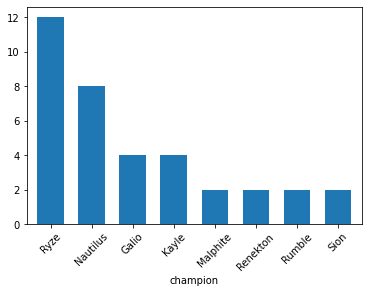

In [ ]:
# from ipywidgets import Dropdown #ipywidgets의 dropdown기능 이용

#드롭다운 변경 시 동작하는 함수
def order_by_player(val):
    clear_output() #필요한 라이브러리 #이미지 위의 영역 초기화
    display(dropdown)    
    pick_data = pd.DataFrame(match_data.loc[(match_data['player']==val['new']) &  
                               (match_data['mvp']==match_data['player'])]['champion'] ) 
    pick_data2 = pick_data.groupby('champion')['champion'].count().sort_values(ascending=False)
    pick_data2.plot.bar(x='champion', y='count', rot=45, width=0.65)
    

player_list = match_data.loc[match_data['player'].isin(match_data['mvp'])]['player'].sort_values(ascending=True).unique().tolist()

dropdown = Dropdown(options=player_list, description='Player:')
dropdown.observe(order_by_player, names='value')
display(dropdown)

# 여기서는 드롭다운 요소가 변경되었을 때만 동작하게 구현되었으므로 초깃값은 함수가 동작하지 않아 데이터가 나오지 않음

### **2. 시간대별 champion 승률(파이/막대)**

Dropdown(description='champion:', index=11, options=('Aatrox', 'Akali', 'Alistar', 'Anivia', 'Ashe', 'Azir', '…

IntSlider(value=20, description='time(m)', max=70, step=5)

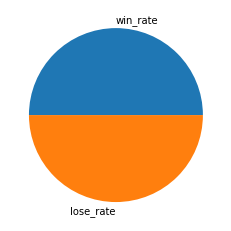

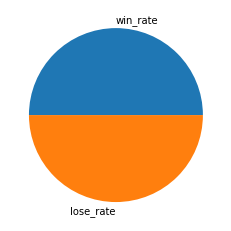

In [ ]:
# 슬라이더
from ipywidgets import IntSlider
from ipywidgets import Dropdown #ipywidgets의 dropdown기능 이용

# Dropdown 객체 핸들러 (champion 선택)
def order_by_champion(val):
    clear_output() #필요한 라이브러리 #이미지 위의 영역 초기화
    display(dropdown)    
    display(slider)


def update_slider(val):
    pick_data = champion19.loc[champion19['champion']==dropdown.value]
    labels = ['win_rate','lose_rate']
    if val['new']<25:
      values = [pick_data['winrate_less_25_min'].str.slice(0,-1).apply(pd.to_numeric), 100-pick_data['winrate_less_25_min'].str.slice(0,-1).apply(pd.to_numeric)]
    elif val['new']>=25 & val['new']<30:
      values = [pick_data['winrate_25_30_min'].str.slice(0,-1).apply(pd.to_numeric), 100-pick_data['winrate_25_30_min'].str.slice(0,-1).apply(pd.to_numeric)]
    elif val['new']>=30 & val['new']<35:
      values = [pick_data['winrate_30_35_min'].str.slice(0,-1).apply(pd.to_numeric), 100-pick_data['winrate_30_35_min'].str.slice(0,-1).apply(pd.to_numeric)]
    elif val['new']>=35 & val['new']<40:
      values = [pick_data['winrate_35_40_min'].str.slice(0,-1).apply(pd.to_numeric), 100-pick_data['winrate_35_40_min'].str.slice(0,-1).apply(pd.to_numeric)]
    elif val['new']>=40 & val['new']<45:
      values = [pick_data['winrate_40_45_min'].str.slice(0,-1).apply(pd.to_numeric), 100-pick_data['winrate_40_45_min'].str.slice(0,-1).apply(pd.to_numeric)]
    elif val['new']>=45:
      values = [pick_data['winrate_more_45_min'].str.slice(0,-1).apply(pd.to_numeric), 100-pick_data['winrate_more_45_min'].str.slice(0,-1).apply(pd.to_numeric)]
    plt.pie(values, labels=labels)


champion_list = champion19['champion'].sort_values(ascending=True).unique().tolist()
dropdown = Dropdown(options=champion_list, description='champion:')
dropdown.observe(order_by_champion, names='value')

slider = IntSlider(value=35, min=0, max=70, step=5, 
                   description='time(m)')   #슬라이드바의 초기값, 최소, 최대, 간격값 설정)
slider.observe(update_slider, names='value')
display(dropdown)